NO3 (mg N/L): {'Mean': 0.006301395792534993, 'Median': 0.0004131975, 'Standard Deviation': 0.020701626293810425}



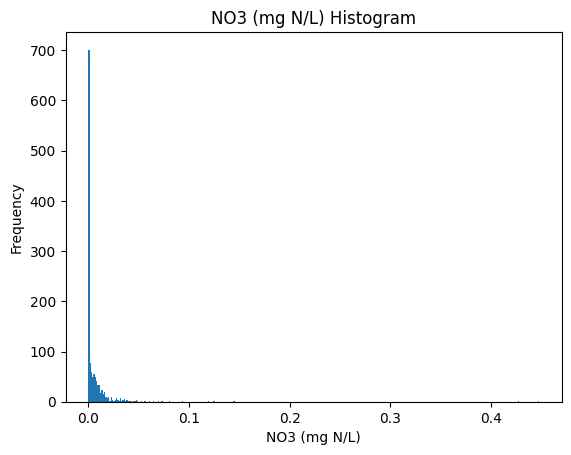

PO4 (mg P/L): {'Mean': 0.019807556426127526, 'Median': 0.014666094000000001, 'Standard Deviation': 0.020579513790501}



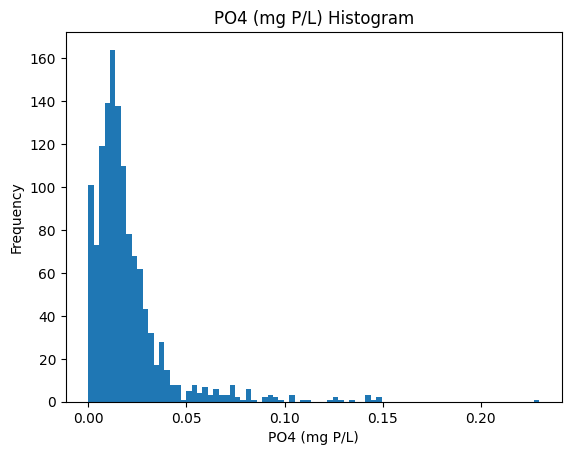

Si (mg Si/L): {'Mean': 0.41541309728538106, 'Median': 0.217827633, 'Standard Deviation': 0.656314689470807}



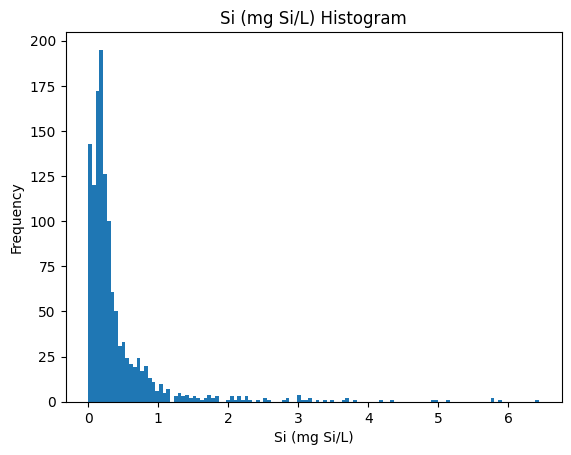

NH4 (mg N/L): {'Mean': 0.04768169314385692, 'Median': 0.023363176, 'Standard Deviation': 0.09572316942479697}



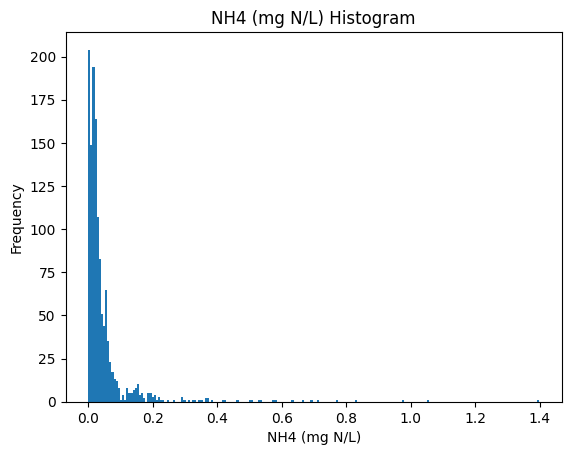

NO2 (mg N/L): {'Mean': 0.002936974135147745, 'Median': 0.002086998, 'Standard Deviation': 0.0035596880446774008}



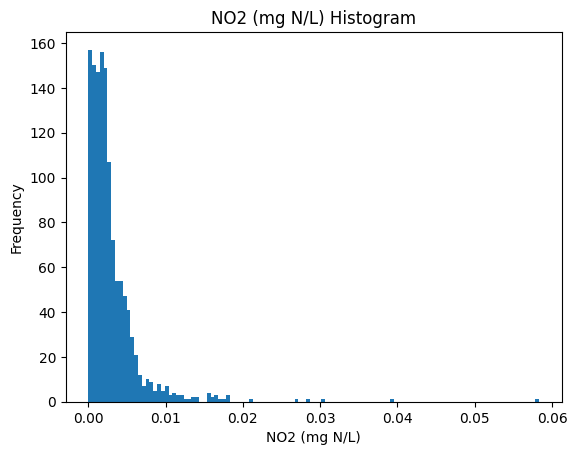

Urea (mg N/L): {'Mean': 0.006776432785614307, 'Median': 0.0053995829999999995, 'Standard Deviation': 0.007306346676286728}



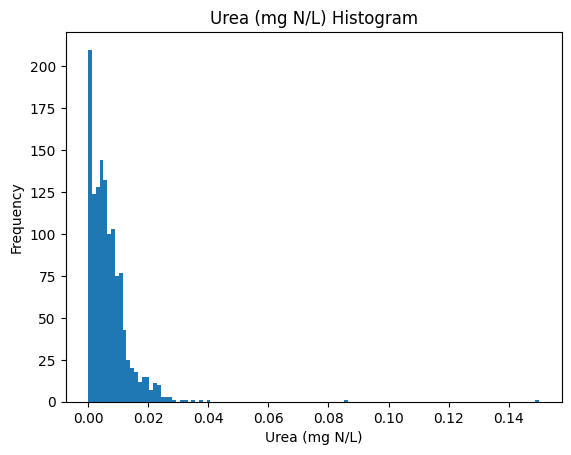

In [19]:
# 1.Data Description 
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('Data-01_Inorganic-Nutrients.csv') #reading data set

variables = ['NO3 (mg N/L)', 'PO4 (mg P/L)', 'Si (mg Si/L)', 'NH4 (mg N/L)', 'NO2 (mg N/L)', 'Urea (mg N/L)']
values = {} #creating empty dictionary to put values of each nutrient in

for col in variables: 
    mean = data[col].mean() #calculating mean of every nutrient
    median = data[col].median() #calculating median of every nutrient
    std_dev = data[col].std() #calculating standard deviation of every nutrient
    values[col] = {'Mean': mean, 'Median': median, 'Standard Deviation': std_dev}
    print(f'{col}: {values[col]}\n')
    
    plt.hist(data[col], bins = "auto")
    plt.title(f'{col} Histogram') #plotting histogram for every nutrient in the file
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


 NO3 (mg N/L) correlations: {'Pearson': PearsonRResult(statistic=-0.14696871879220838, pvalue=1.196244959457867e-07), 'Spearman': -0.26953310872754677}



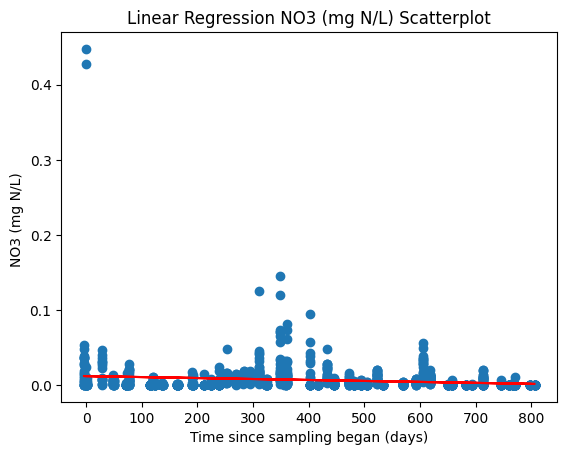

 PO4 (mg P/L) correlations: {'Pearson': PearsonRResult(statistic=-0.10700697887846534, pvalue=0.00012071363373172658), 'Spearman': -0.16532863791430605}



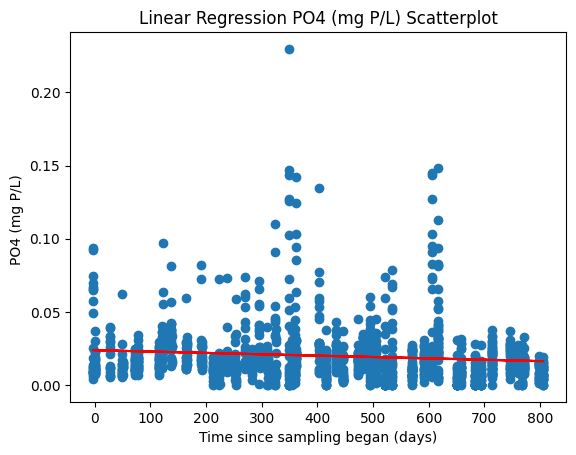

 Si (mg Si/L) correlations: {'Pearson': PearsonRResult(statistic=-0.2525746704587216, pvalue=3.637670360461948e-20), 'Spearman': -0.21022207473683693}



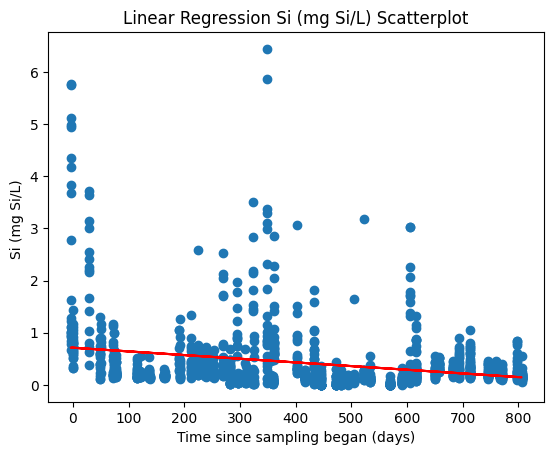

 NH4 (mg N/L) correlations: {'Pearson': PearsonRResult(statistic=-0.03544788633404049, pvalue=0.2039585122040555), 'Spearman': 0.03513036831364237}



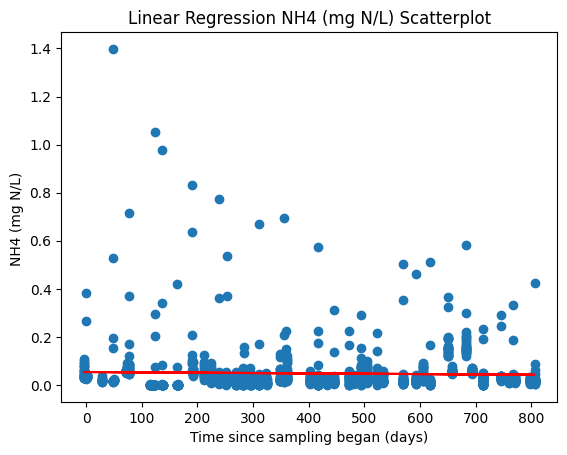

 NO2 (mg N/L) correlations: {'Pearson': PearsonRResult(statistic=-0.03877806559079114, pvalue=0.16459431707614106), 'Spearman': -0.07557003681056398}



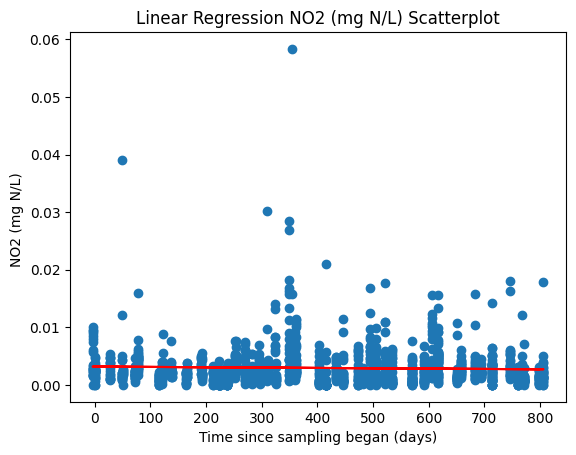

 Urea (mg N/L) correlations: {'Pearson': PearsonRResult(statistic=-0.008771675511044049, pvalue=0.7533237081317968), 'Spearman': 0.005817941886718474}



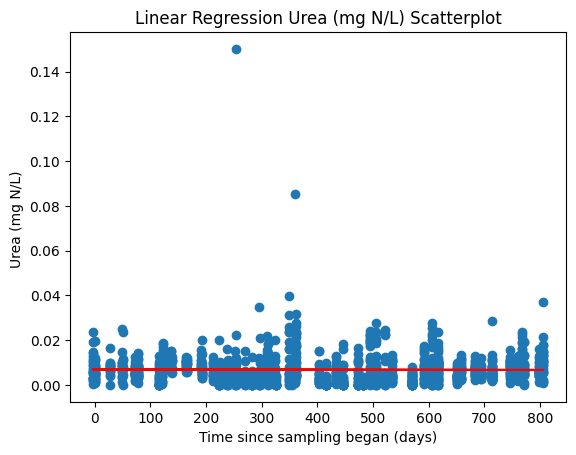

In [23]:
# 2.Correlation
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt

data = pd.read_csv('Data-01_Inorganic-Nutrients.csv') #reading data set

variables = ['NO3 (mg N/L)', 'PO4 (mg P/L)', 'Si (mg Si/L)', 'NH4 (mg N/L)', 'NO2 (mg N/L)', 'Urea (mg N/L)']
correlation = {} #initializing to put spearman and pearson correlations

data['Collection_Date'] = pd.to_datetime(data['Collection_Date'], format = '%m/%d/%y')
reference_date = pd.to_datetime('09/26/2016')

data['Collection_Date'] = (data['Collection_Date'] - reference_date).dt.days #getting the amount of time, in days, passed since the first day that samples were collected

for col in variables: 
    pearson = stats.pearsonr(data['Collection_Date'], data[col]) #calculating pearson correlation
    spearman = stats.spearmanr(data['Collection_Date'], data[col]) #calculating spearman correlation
    correlation[col] = {'Pearson': pearson, 'Spearman': spearman.statistic}
    print(f" {col} correlations: {correlation[col]}\n") #printing spearman and pearson correlations 
    
    x = data['Collection_Date']
    y = data[col]
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y) # linear regression
    plt.scatter(x,y)
    plt.plot(x, intercept + slope*x, 'r')
    plt.xlabel('Time since sampling began (days)')
    plt.ylabel(f'{col} ')
    plt.title(f'Linear Regression {col} Scatterplot') #creating scatterplot
    plt.show()

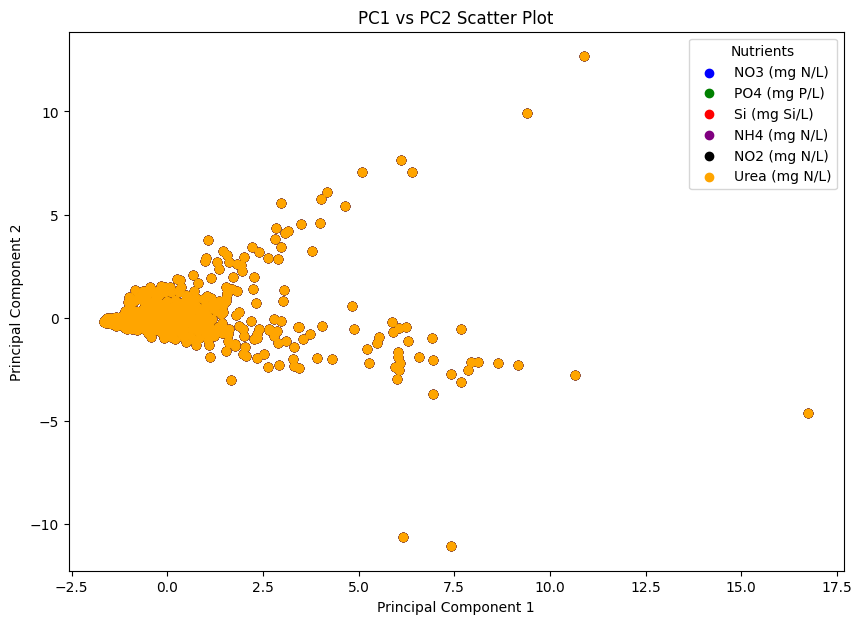

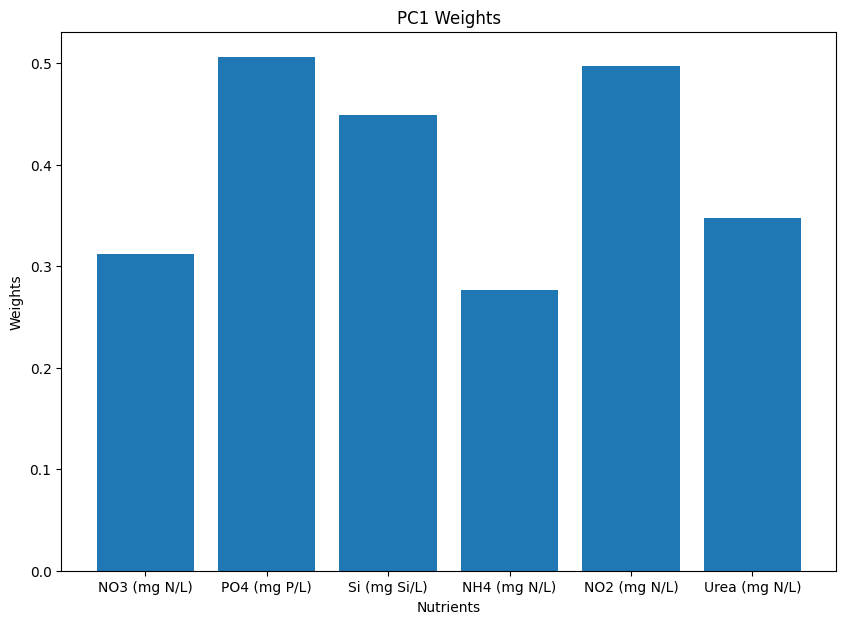

In [25]:
#3. dimensionality reduction
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Data-01_Inorganic-Nutrients.csv') #reading data set

variables = ['NO3 (mg N/L)', 'PO4 (mg P/L)', 'Si (mg Si/L)', 'NH4 (mg N/L)', 'NO2 (mg N/L)', 'Urea (mg N/L)'] 
nutrients = data[variables] #getting the numerical values in the desired variables

scaler=StandardScaler()
new_data = scaler.fit_transform(nutrients)

#conducting principal component analysis
pca = PCA(n_components=2) #reducing dimensionality to 2 principle components
principle_component = pca.fit_transform(new_data)

pca_data = pd.DataFrame(data = principle_component, columns = ['PC1', 'PC2'])

#assigning a color to each column to colorcode when plotting
colors = ['blue', 'green', 'red', 'purple', 'black', 'orange']

plt.figure(figsize=(10,7))
for (color, variable) in zip(colors, variables):
    plt.scatter(pca_data['PC1'], pca_data['PC2'], color = color, label = variable)
    

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2 Scatter Plot')
plt.legend(title = 'Nutrients')
plt.show()

#finding the principal component weight and plotting bar chart
weights_data = pd.DataFrame(pca.components_.T, index= variables, columns = ['PC1', 'PC2'])

plt.figure(figsize=(10,7))
plt.bar(weights_data.index, weights_data['PC1'])
plt.title('PC1 Weights')
plt.xlabel('Nutrients')
plt.ylabel('Weights')
plt.show()



